In [1]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import chi2_contingency
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTETomek, SMOTEENN

sns.set()
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
data = pd.read_csv("Visadataset.csv")

In [3]:
# a view of the dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
# print the shape of the data
data.shape

(25480, 12)

### Data Cleaning

#### Handling Missing values

- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset

In [5]:
# understanding the dataset and feature data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
# check for missing values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- This shows there are no missing values in the dataset

In [7]:
# check for duplicate rows
data.duplicated().sum()

0

- No duplicate rows in the dataset

In [8]:
# droping the case_id column since its just an identifier
data.drop("case_id", inplace = True, axis = 1)

### Feature Engineering

#### Feature Extraction 

In [9]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [10]:
# to get the company's age from year of establishment
today_date = datetime.today() 
current_year = today_date.year

In [11]:
data["company_age"] = data["yr_of_estab"].apply(lambda x: current_year - x)

In [12]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [13]:
# dropping the year of establishment
data.drop("yr_of_estab", inplace = True, axis = 1)

#### Type of Features

In [14]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != "O"]
print("Number of numerical features: {}".format(len(numerical_features)))

Number of numerical features: 3


In [15]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]
print("Number of categorical features: {}".format(len(categorical_features)))

Number of categorical features: 8


In [16]:
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) <= 25]
print("Number of discrete features: {}".format(len(discrete_features)))


Number of discrete features: 0


In [17]:
continous_features = [feature for feature in numerical_features if data[feature].nunique() > 25]
print(f"Number of continous features: {len(continous_features)}")

Number of continous features: 3


#### spliting the data into training and testing

In [18]:
x = data.drop("case_status", axis = 1)
y = data["case_status"]

In [19]:
x.shape

(25480, 10)

In [20]:
y.shape

(25480,)

In [21]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [22]:
# Encoding the target variable
y = y.map({"Certified": 1, "Denied": 0})

In [23]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: case_status, dtype: int64

#### Feature_Transformation

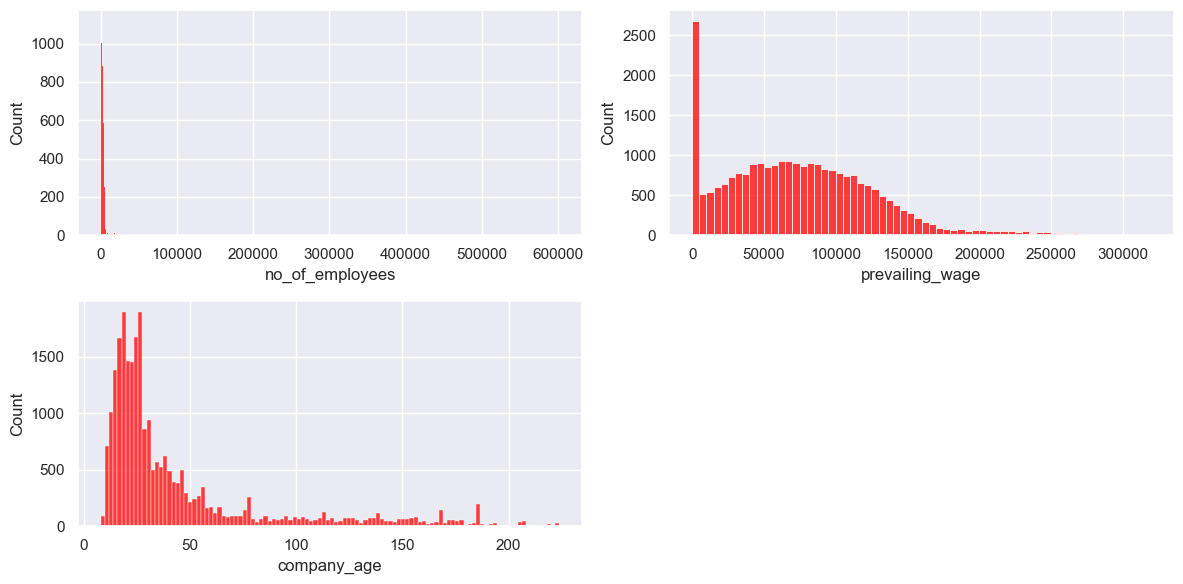

In [24]:
# the data distribution before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(data[numerical_features].columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=x[col], color='red')
    plt.xlabel(col)
    plt.tight_layout()


- No of employees and Copmany age column is skewed which might affect the perfomance of the model
- Power transform can be applied to make data more Gaussian-like and reduce ouliers

In [25]:
# calculating the skewness value 
x[numerical_features].skew(axis = 0)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [26]:
pt = PowerTransformer(method = "yeo-johnson")
x_copy = pt.fit_transform(x[numerical_features])

In [27]:
x_copy = pd.DataFrame(x_copy, columns = numerical_features)

In [28]:
x_copy.head()

,no_of_employees,prevailing_wage,company_age
0,1.517300,-1.939151,-0.952162
1,0.030912,0.345033,-0.462942
2,2.885076,0.915559,-1.075820
3,-1.343550,0.345166,1.629178
4,-0.432287,1.255555,-0.733953


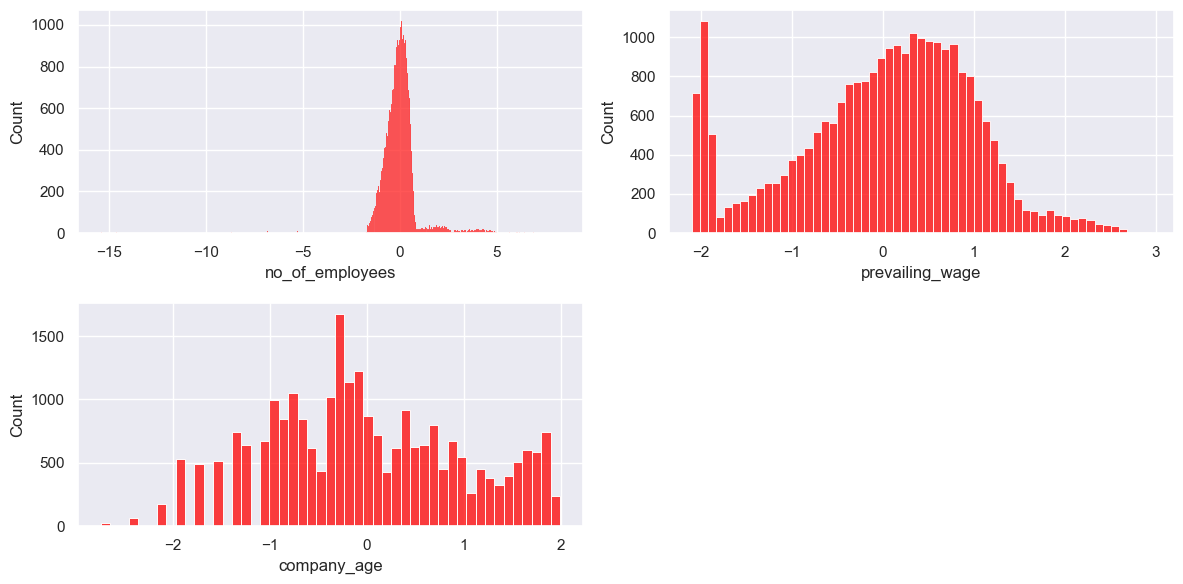

In [29]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(data[numerical_features].columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=x_copy[col], color='red')
    plt.xlabel(col)
    plt.tight_layout()

In [30]:
# checking skewness after transforming
x_copy.skew(axis = 0)

no_of_employees    0.399339
prevailing_wage   -0.338620
company_age        0.103264
dtype: float64

- This shows power tarnformation is efficient in reducing the skewness and outliers in the numerical_features
- It also makes the distribution of the features tend toward normanl distribution

In [31]:
# printing the number of unique values in each categorical_features
for feature in categorical_features:
    print(feature, ":", data[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


#### Feature Encoding and Scaling 

In [32]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


In [33]:
oh_columns = ["continent", "region_of_employment", "unit_of_wage"]
or_columns = ["education_of_employee", "has_job_experience", "requires_job_training", "full_time_position"]
transform_columns = numerical_features.copy()

In [34]:
scaler = StandardScaler()
oh_encoder = OneHotEncoder()
or_encoder = OrdinalEncoder()

tranform_pipeline  = Pipeline(steps = [("transformer", PowerTransformer(method = "yeo-johnson")),
                                       ("scaler", scaler)
                                       ])

preprocessor = ColumnTransformer([
    ("oh_encoder", oh_encoder, oh_columns),
    ("or_encoder", or_encoder, or_columns),
    ("transformer", tranform_pipeline, transform_columns)
])

In [35]:
x = preprocessor.fit_transform(x)

In [36]:
x[0].shape

(22,)

### Classification

#### Imbalance Target Variable

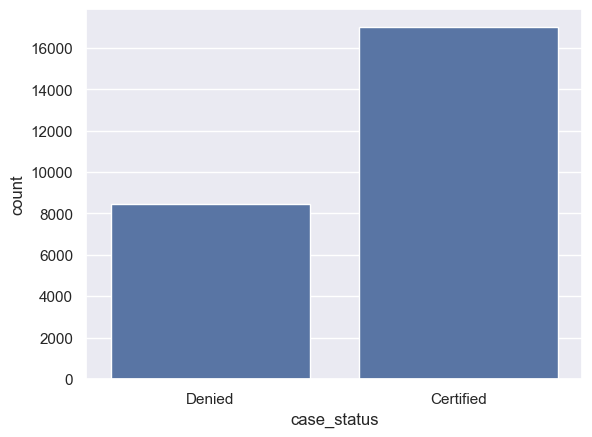

In [37]:
sns.countplot(data = data, x = "case_status")
plt.show()

In [38]:
# resampling the minority class
sm = SMOTE(random_state = 42)
x_res, y_res = sm.fit_resample(x, y)

In [39]:
x_res_df = pd.DataFrame(x_res)
y_res_df = pd.DataFrame(y_res)
res = pd.concat([x_res_df, y_res_df], axis = 1)


In [40]:
x_res.shape

(34036, 22)

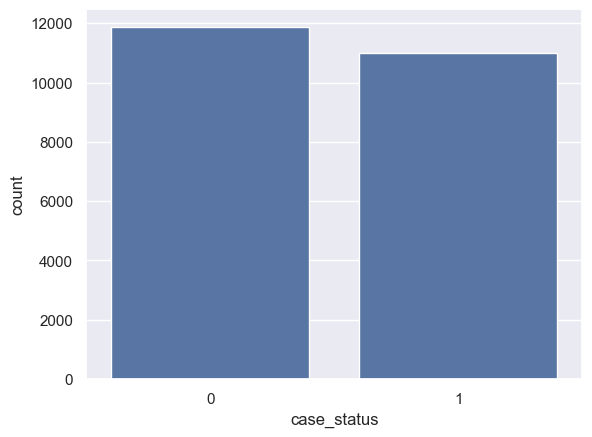

In [41]:
sns.countplot(data = res, x = "case_status")
plt.show()

In [42]:
x.shape

(25480, 22)

In [43]:
data.shape

(25480, 11)

### Train Test Split

In [46]:
# splitting the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, random_state = 42, test_size = 0.2)

In [47]:
x_train.shape, x_test.shape

((27228, 22), (6808, 22))

In [51]:
def eval_metrics(true, predicted):
    accuracy = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return accuracy, f1, precision, recall, roc_auc

In [50]:
models = {"RF": RandomForestClassifier(),
          "DT": DecisionTreeClassifier(),
          "GB": GradientBoostingClassifier(),
          "LR": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "XGB": XGBClassifier(),
          "CB": CatBoostClassifier(),
          "SVM": SVC(),
          "ADB": AdaBoostClassifier()
          }

In [62]:
def model_evaluation(x, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Return
    '''

    # splitting the data into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, random_state = 42, test_size = 0.2)

    model_list = []
    accuracy_list = []
    auc_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model_name = list(models.keys())[i]

        # train the model
        model.fit(x_train, y_train)

        # make prediction
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        # training evaluation metrics
        accuracy_train, f1_train, precision_train, recall_train, roc_auc_train = eval_metrics(y_train, y_train_pred)

        # testing evaluation metrics
        accuracy_test, f1_test, precision_test, recall_test, roc_au_test = eval_metrics(y_test, y_test_pred)

        model_list.append(model_name)
        print(model_name)

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(accuracy_train))
        print('- F1 score: {:.4f}'.format(f1_train)) 
        print('- Precision: {:.4f}'.format(precision_train))
        print('- Recall: {:.4f}'.format(recall_train))
        print('- Roc Auc Score: {:.4f}'.format(roc_auc_train))

        print('-' * 35)

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(accuracy_test))
        accuracy_list.append(accuracy_test)
        print('- F1 score: {:.4f}'.format(f1_test))
        print('- Precision: {:.4f}'.format(precision_test))
        print('- Recall: {:.4f}'.format(recall_test))
        print('- Roc Auc Score: {:.4f}'.format(roc_au_test))
        auc_list.append(roc_au_test)
        print('=' * 35)
        print('\n')
        
    report = pd.DataFrame(list(zip(model_list, accuracy_list, auc_list)), columns=['Model Name', 'Accuracy', "AUC_score"]).sort_values(by=['Accuracy'], ascending=False)
        
    return report





#### Model Training

In [63]:
base_model = model_evaluation(x_res, y_res, models)

RF
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------
Model performance for Test set
- Accuracy: 0.7744
- F1 score: 0.7696
- Precision: 0.7904
- Recall: 0.7498
- Roc Auc Score: 0.7745


DT
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------
Model performance for Test set
- Accuracy: 0.7058
- F1 score: 0.7057
- Precision: 0.7095
- Recall: 0.7018
- Roc Auc Score: 0.7058


GB
Model performance for Training set
- Accuracy: 0.7428
- F1 score: 0.7428
- Precision: 0.7420
- Recall: 0.7435
- Roc Auc Score: 0.7428
-----------------------------------
Model performance for Test set
- Accuracy: 0.7287
- F1 score: 0.7301
- Precision: 0.7300
- Recall: 0.7302
- Roc Auc Score: 0.7287


LR
Model performance for Training set
- Accuracy: 0.6326
- F1 score: 0.6434
- Precisi

In [64]:
base_model

,Model Name,Accuracy,AUC_score
6,CB,0.783637,0.783458
0,RF,0.774383,0.774507
5,XGB,0.757785,0.757737
4,KNN,0.733402,0.733688
2,GB,0.728702,0.728694
7,SVM,0.707256,0.707113
1,DT,0.705787,0.705807
8,ADB,0.705640,0.705629
3,LR,0.625441,0.625305


#### Hyperparameter Tunning

In [66]:
#Initialize few parameter for Hyperparamter tuning
xgb_params = {
    "max_depth": range(3, 10, 2),
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [10, 50, 100, 200]
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [69]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgb_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
    ]

In [72]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(x_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [73]:
model_param

{'XGBoost': {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 9},
 'RF': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

#### Retraining the Model with best Parameters

In [77]:
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report = model_evaluation(x_res, y_res, best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------
Model performance for Test set
- Accuracy: 0.7751
- F1 score: 0.7708
- Precision: 0.7899
- Recall: 0.7527
- Roc Auc Score: 0.7752


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------
Model performance for Test set
- Accuracy: 0.7647
- F1 score: 0.7453
- Precision: 0.8170
- Recall: 0.6852
- Roc Auc Score: 0.7651


XGBClassifier
Model performance for Training set
- Accuracy: 0.8802
- F1 score: 0.8798
- Precision: 0.8813
- Recall: 0.8784
- Roc Auc Score: 0.8802
-----------------------------------
Model performance for Test set
- Accuracy: 0.7582
- F1 score: 0.7602
- Precision: 0.7578
- Recall: 0.7626
- Roc Auc Score: 0.7582




In [78]:
tuned_report

,Model Name,Accuracy,AUC_score
0,Random Forest Classifier,0.775118,0.775230
1,KNeighborsClassifier,0.764689,0.765088
2,XGBClassifier,0.758226,0.758203


In [80]:
best_model = RandomForestClassifier(**model_param['RF'])
best_model = best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("FINAL MODEL 'RF'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'RF'
Accuracy Score value: 0.7763
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      3387
           1       0.79      0.75      0.77      3421

    accuracy                           0.78      6808
   macro avg       0.78      0.78      0.78      6808
weighted avg       0.78      0.78      0.78      6808



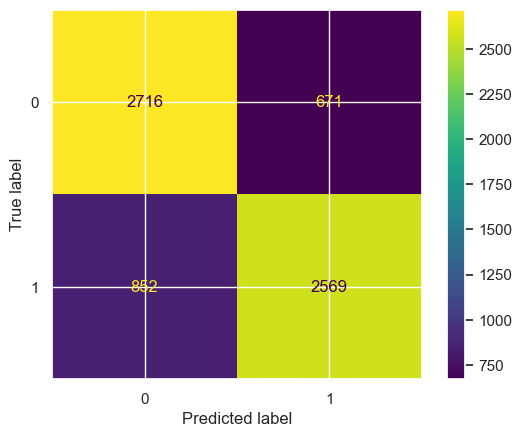

In [82]:
ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)